# **Atividade Final Data Science - Aprendizado Supervisionado**

Aluno: Matheus Zalamena e Souza  
RGM: 12948128


## Contextualização e Objetivo:

Link de referência do Dataset: https://www.kaggle.com/datasets/shariful07/student-mental-health

O Projeto tem como base o Dataset público "Student Mental Health" retirado do Kaggle com informações sobre os perfis dos estudantes de uma Universidade pública na Malásia com relação a saúde mental (Atualizado em 2022).

O Objetivo do projeto é treinar um algoritmo usando **Árvore de Decisão, Random Forests e Regressão Logística** para prever a tendência dos estudantes de procura por Tratamento Psicológico Profissional tendo como base o perfil de cada estudante e o histórico de doenças como Depressão e Ansiedade.

## Inicialização e imports

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
from google.colab import drive
import pandas as pandas
import numpy as np
from sklearn.preprocessing import StandardScaler as ss
from sklearn import tree
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

## Inicializando o Dataset e fazendo limpeza dos dados

In [85]:
df_inicial = pandas.read_csv('/content/drive/MyDrive/DS FINAL/Student Mental health - Student Mental health.csv', encoding='latin-1', sep=',')

In [86]:
df_inicial.head()

,Timestamp,Choose your gender,Age,What is your course,Your current year of Study,What is your CGPA,Marital status,Do you have Depression,Do you have Anxiety,Do you have Panic attack,Did you seek any specialist for a treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [87]:
df_inicial.shape

(101, 11)

Fazendo tradução das colunas e filtrando os campos que serão utilizados:

In [88]:
df_inicial = df_inicial.drop(columns=['Timestamp'])
df_inicial = df_inicial.drop(columns=['What is your course'])
df_inicial.columns = df_inicial.columns.str.replace('Choose your gender', 'Sexo'
                                  ).str.replace('Age', 'Idade'
                                  ).str.replace('Your current year of Study', 'Ano atual do curso'
                                  ).str.replace('What is your CGPA', 'Média Notas'
                                  ).str.replace('Marital status', 'Estado Civil'
                                  ).str.replace('Do you have Depression', 'Depressão'
                                  ).str.replace('Do you have Anxiety', 'Ansiedade'
                                  ).str.replace('Do you have Panic attack', 'Ataque de Pânico'
                                  ).str.replace('Did you seek any specialist for a treatment', 'Tratamento Profissional')

In [89]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     101 non-null    object 
 1   Idade                    100 non-null    float64
 2   Ano atual do curso       101 non-null    object 
 3   Média Notas              101 non-null    object 
 4   Estado Civil             101 non-null    object 
 5   Depressão                101 non-null    object 
 6   Ansiedade                101 non-null    object 
 7   Ataque de Pânico         101 non-null    object 
 8   Tratamento Profissional  101 non-null    object 
dtypes: float64(1), object(8)
memory usage: 7.2+ KB


In [90]:
df_inicial.head()

,Sexo,Idade,Ano atual do curso,Média Notas,Estado Civil,Depressão,Ansiedade,Ataque de Pânico,Tratamento Profissional
0,Female,18.0,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,year 4,3.00 - 3.49,No,No,No,No,No


In [91]:
df_inicial['Sexo'].unique()

array(['Female', 'Male'], dtype=object)

In [92]:
df_inicial['Sexo'] = df_inicial['Sexo'].replace('Female', 'Feminino')
df_inicial['Sexo'] = df_inicial['Sexo'].replace('Male', 'Masculino')

In [93]:
df_inicial['Idade'].unique()

array([18., 21., 19., 22., 23., 20., 24., nan])

In [94]:
#verificando e removendo a linha com valor nulo e transformando idade em int
df_inicial[df_inicial['Idade'].isna()]
df_inicial = df_inicial.drop(43)

In [95]:
df_inicial['Idade'] = df_inicial['Idade'].astype(int)

In [96]:
df_inicial['Ano atual do curso'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [97]:
df_inicial['Ano atual do curso'] = df_inicial['Ano atual do curso']. replace(['year 1','Year 1'], '1 ano')
df_inicial['Ano atual do curso'] = df_inicial['Ano atual do curso']. replace(['year 2','Year 2'], '2 ano')
df_inicial['Ano atual do curso'] = df_inicial['Ano atual do curso']. replace(['year 3','Year 3'], '3 ano')
df_inicial['Ano atual do curso'] = df_inicial['Ano atual do curso']. replace(['year 4','Year 4'], '4 ano')

In [98]:
df_inicial['Ano atual do curso'].unique()

array(['1 ano', '2 ano', '3 ano', '4 ano'], dtype=object)

In [99]:
df_inicial['Média Notas'].unique() 

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [100]:
#convertendo para float e corrigindo os valores para a maior opção
df_inicial['Média Notas'] = df_inicial['Média Notas'].replace(['0 - 1.99'], '1.99')

In [101]:
df_inicial['Média Notas'] = df_inicial['Média Notas'].replace(['2.00 - 2.49'], '2.49')

In [102]:
df_inicial['Média Notas'] = df_inicial['Média Notas'].replace(['2.50 - 2.99'], '2.99')

In [103]:
df_inicial['Média Notas'] = df_inicial['Média Notas'].replace(['3.00 - 3.49'], '3.49')

In [104]:
df_inicial['Média Notas'] = df_inicial['Média Notas'].replace(['3.50 - 4.00'], '4.00')
df_inicial['Média Notas'] = df_inicial['Média Notas'].astype(float)

In [105]:
df_inicial['Média Notas'].unique() 

array([3.49, 4.  , 2.99, 2.49, 1.99])

In [106]:
df_inicial['Estado Civil'].unique() 

array(['No', 'Yes'], dtype=object)

In [107]:
df_inicial['Estado Civil'] = df_inicial['Estado Civil'].replace('No', 'Não')
df_inicial['Estado Civil'] = df_inicial['Estado Civil'].replace('Yes', 'Sim')

In [108]:
df_inicial['Depressão'].unique() 

array(['Yes', 'No'], dtype=object)

In [109]:
df_inicial['Depressão'] = df_inicial['Depressão'].replace('No', 'Não')
df_inicial['Depressão'] = df_inicial['Depressão'].replace('Yes', 'Sim')

In [110]:
df_inicial['Ansiedade'].unique() 

array(['No', 'Yes'], dtype=object)

In [111]:
df_inicial['Ansiedade'] = df_inicial['Ansiedade'].replace('No', 'Não')
df_inicial['Ansiedade'] = df_inicial['Ansiedade'].replace('Yes', 'Sim')

In [112]:
df_inicial['Ataque de Pânico'].unique() 

array(['Yes', 'No'], dtype=object)

In [113]:
df_inicial['Ataque de Pânico'] = df_inicial['Ataque de Pânico'].replace('No', 'Não')
df_inicial['Ataque de Pânico'] = df_inicial['Ataque de Pânico'].replace('Yes', 'Sim')

In [114]:
df_inicial['Tratamento Profissional'].unique() 

array(['No', 'Yes'], dtype=object)

In [115]:
df_inicial['Tratamento Profissional'] = df_inicial['Tratamento Profissional'].replace('No', 'Não')
df_inicial['Tratamento Profissional'] = df_inicial['Tratamento Profissional'].replace('Yes', 'Sim')

In [116]:
df_inicial.head()

,Sexo,Idade,Ano atual do curso,Média Notas,Estado Civil,Depressão,Ansiedade,Ataque de Pânico,Tratamento Profissional
0,Feminino,18,1 ano,3.49,Não,Sim,Não,Sim,Não
1,Masculino,21,2 ano,3.49,Não,Não,Sim,Não,Não
2,Masculino,19,1 ano,3.49,Não,Sim,Sim,Sim,Não
3,Feminino,22,3 ano,3.49,Sim,Sim,Não,Não,Não
4,Masculino,23,4 ano,3.49,Não,Não,Não,Não,Não


In [117]:
df_definitivo = df_inicial

## Transformando variáveis nominais em numéricas ordinais:

In [118]:
df_definitivo.dtypes

Sexo                        object
Idade                        int64
Ano atual do curso          object
Média Notas                float64
Estado Civil                object
Depressão                   object
Ansiedade                   object
Ataque de Pânico            object
Tratamento Profissional     object
dtype: object

In [119]:
df_definitivo['Sexo'].replace({'Feminino':0, 'Masculino': 1}, inplace=True)
df_definitivo['Ano atual do curso'].replace({'1 ano':0, '2 ano': 1, '3 ano': 2, '4 ano': 3}, inplace=True)
df_definitivo['Estado Civil'].replace({'Não': 0,'Sim': 1}, inplace=True)
df_definitivo['Depressão'].replace({'Não': 0,'Sim': 1}, inplace=True)
df_definitivo['Ansiedade'].replace({'Não': 0,'Sim': 1}, inplace=True)
df_definitivo['Ataque de Pânico'].replace({'Não': 0,'Sim': 1}, inplace=True)
df_definitivo['Tratamento Profissional'].replace({'Não': 0,'Sim': 1}, inplace=True)

In [120]:
df_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     100 non-null    int64  
 1   Idade                    100 non-null    int64  
 2   Ano atual do curso       100 non-null    int64  
 3   Média Notas              100 non-null    float64
 4   Estado Civil             100 non-null    int64  
 5   Depressão                100 non-null    int64  
 6   Ansiedade                100 non-null    int64  
 7   Ataque de Pânico         100 non-null    int64  
 8   Tratamento Profissional  100 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.8 KB


In [121]:
df_definitivo.head()

,Sexo,Idade,Ano atual do curso,Média Notas,Estado Civil,Depressão,Ansiedade,Ataque de Pânico,Tratamento Profissional
0,0,18,0,3.49,0,1,0,1,0
1,1,21,1,3.49,0,0,1,0,0
2,1,19,0,3.49,0,1,1,1,0
3,0,22,2,3.49,1,1,0,0,0
4,1,23,3,3.49,0,0,0,0,0


##Legendas após transformação de variáveis:

Sexo
* Feminino = 0;
* Masculino = 1; 

Ano do Curso
* 1º Ano =  0;
* 2º Ano =  1;
* 3º Ano =  2;
* 4º Ano =  3;

Estado Civil
* Solteiro = 0;
* Casado = 1;

Tem/Teve Depressão?
* Não = 0;
* Sim = 1;

Tem/Teve Ansiedade?
* Não = 0;
* Sim = 1;

Tem/Teve Ataque de Pânico?
* Não = 0;
* Sim = 1;

Faz/fez tratamento profissional?
* Não = 0;
* Sim = 1;

## Definição dos Previsores e do Alvo:

Como dito na parte inicial do projeto, será utilizado o perfil dos estudantes com relação a idade, notas, ano de curso e o histórico de doenças psicológicas para prever a tendência de procura por Tratamento Profissional. Sendo assim, utilizaremos as outras colunas como **Previsores** e o **Alvo** será a coluna de **'Tratamento Profissional'**.

In [122]:
df_definitivo.head(10)

,Sexo,Idade,Ano atual do curso,Média Notas,Estado Civil,Depressão,Ansiedade,Ataque de Pânico,Tratamento Profissional
0,0,18,0,3.49,0,1,0,1,0
1,1,21,1,3.49,0,0,1,0,0
2,1,19,0,3.49,0,1,1,1,0
3,0,22,2,3.49,1,1,0,0,0
4,1,23,3,3.49,0,0,0,0,0
5,1,19,1,4.00,0,0,0,1,0
6,0,23,1,4.00,1,1,0,1,0
7,0,18,0,4.00,0,0,1,0,0
8,0,19,1,2.99,0,0,0,0,0
9,1,18,0,4.00,0,0,1,1,0


In [123]:
#selecionando as colunas que serão usadas como previsores
previsores = df_definitivo.iloc[:, 0:8].values

In [124]:
previsores

array([[ 0.  , 18.  ,  0.  ,  3.49,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 1.  , 21.  ,  1.  ,  3.49,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 1.  , 19.  ,  0.  ,  3.49,  0.  ,  1.  ,  1.  ,  1.  ],
       [ 0.  , 22.  ,  2.  ,  3.49,  1.  ,  1.  ,  0.  ,  0.  ],
       [ 1.  , 23.  ,  3.  ,  3.49,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , 19.  ,  1.  ,  4.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  , 23.  ,  1.  ,  4.  ,  1.  ,  1.  ,  0.  ,  1.  ],
       [ 0.  , 18.  ,  0.  ,  4.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  , 19.  ,  1.  ,  2.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  , 18.  ,  0.  ,  4.  ,  0.  ,  0.  ,  1.  ,  1.  ],
       [ 0.  , 20.  ,  0.  ,  4.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , 24.  ,  2.  ,  4.  ,  1.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  , 18.  ,  0.  ,  3.49,  0.  ,  1.  ,  0.  ,  0.  ],
       [ 1.  , 19.  ,  0.  ,  3.49,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , 18.  ,  1.  ,  4.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 1.  , 24.  ,  2.

In [125]:
previsores.shape

(100, 8)

In [126]:
#selecionando a coluna que será usada como alvo
alvo = df_definitivo.iloc[:, 8].values

In [127]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
alvo.shape

(100,)

##Escalonamento

In [129]:
df_definitivo.describe()

,Sexo,Idade,Ano atual do curso,Média Notas,Estado Civil,Depressão,Ansiedade,Ataque de Pânico,Tratamento Profissional
count,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250000,20.53000,0.980000,3.64980,0.160000,0.350000,0.340000,0.330000,0.060000
std,0.435194,2.49628,0.994734,0.44587,0.368453,0.479372,0.476095,0.472582,0.238683
min,0.000000,18.00000,0.000000,1.99000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,0.000000,3.49000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,1.000000,3.49000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,23.00000,2.000000,4.00000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,3.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
previsores_esc = ss().fit_transform(previsores)
previsores_esc

array([[-0.57735027, -1.01861394, -0.99015159, -0.36020607, -0.43643578,
         1.36277029, -0.71774056,  1.42488702],
       [ 1.73205081,  0.18922868,  0.02020718, -0.36020607, -0.43643578,
        -0.73379939,  1.39326109, -0.70181003],
       [ 1.73205081, -0.61599974, -0.99015159, -0.36020607, -0.43643578,
         1.36277029,  1.39326109,  1.42488702],
       [-0.57735027,  0.59184288,  1.03056594, -0.36020607,  2.29128785,
         1.36277029, -0.71774056, -0.70181003],
       [ 1.73205081,  0.99445709,  2.0409247 , -0.36020607, -0.43643578,
        -0.73379939, -0.71774056, -0.70181003],
       [ 1.73205081, -0.61599974,  0.02020718,  0.78938778, -0.43643578,
        -0.73379939, -0.71774056,  1.42488702],
       [-0.57735027,  0.99445709,  0.02020718,  0.78938778,  2.29128785,
         1.36277029, -0.71774056,  1.42488702],
       [-0.57735027, -1.01861394, -0.99015159,  0.78938778, -0.43643578,
        -0.73379939,  1.39326109, -0.70181003],
       [-0.57735027, -0.61599974

In [131]:
previsores_df = pandas.DataFrame(previsores_esc)
previsores_df

,0,1,2,3,4,5,6,7
0,-0.577350,-1.018614,-0.990152,-0.360206,-0.436436,1.362770,-0.717741,1.424887
1,1.732051,0.189229,0.020207,-0.360206,-0.436436,-0.733799,1.393261,-0.701810
2,1.732051,-0.616000,-0.990152,-0.360206,-0.436436,1.362770,1.393261,1.424887
3,-0.577350,0.591843,1.030566,-0.360206,2.291288,1.362770,-0.717741,-0.701810
4,1.732051,0.994457,2.040925,-0.360206,-0.436436,-0.733799,-0.717741,-0.701810
...,...,...,...,...,...,...,...,...
95,-0.577350,0.189229,-0.990152,0.789388,-0.436436,-0.733799,1.393261,-0.701810
96,1.732051,-1.018614,0.020207,-0.360206,-0.436436,1.362770,1.393261,-0.701810
97,-0.577350,-0.616000,1.030566,0.789388,2.291288,1.362770,-0.717741,1.424887
98,-0.577350,0.994457,2.040925,0.789388,-0.436436,-0.733799,-0.717741,-0.701810


alvo = coluna que se pretende atingir (houve ou não a procura por Atendimento Profissional).

previsores = variáveis dos perfis dos estudantes (idade, notas, ano de curso e o histórico de doenças psicológicas) transformadas em numéricas manualmente quando necessário, sem escalonar.

previsores_esc = variáveis dos previsores após escalonamento.

##Treino e Teste

In [132]:
#parâmetro "test_size" foi zerado pois o dataset já é relativamente pequeno, não há necessidade de trabalhar apenas com uma porcentagem dele
x_treino, x_teste, y_treino, y_teste = tts(previsores_esc, alvo, random_state = 0)

In [133]:
x_treino.shape

(75, 8)

In [134]:
x_teste.shape

(25, 8)

In [135]:
y_treino.shape

(75,)

In [136]:
y_teste.shape

(25,)

#Árvore de Decisão

In [ ]:
#Gerando a árvore de decisão com os critérios: 'entropy' e 'max_depth = 3'
arvore = dtc(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.375, 0.875, 'X[5] <= 0.314\nentropy = 0.3\nsamples = 75\nvalue = [71, 4]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(0.5, 0.625, 'X[3] <= -0.924\nentropy = 0.619\nsamples = 26\nvalue = [22, 4]'),
 Text(0.25, 0.375, 'X[6] <= 0.338\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.375, 'X[3] <= 0.215\nentropy = 0.426\nsamples = 23\nvalue = [21, 2]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.875, 0.125, 'entropy = 0.764\nsamples = 9\nvalue = [7, 2]')]

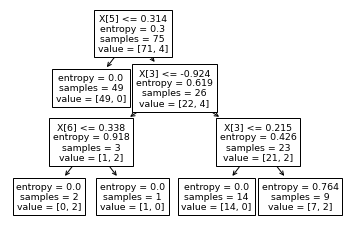

In [ ]:
tree.plot_tree(_arvore)

##Árvore de Decisão - Dados de Teste

In [ ]:
previsoes_teste = arvore.predict(x_teste)

In [ ]:
print("Acurácia Teste: %.2f%%" %(accuracy_score(y_teste, previsoes_teste)*100.0))

Acurácia Teste: 92.00%


In [ ]:
print(classification_report(y_teste, previsoes_teste))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



In [ ]:
#Gerando matriz de confusão
confusion_matrix(y_teste, previsoes_teste)

array([[23,  0],
       [ 2,  0]])

##Árvore de Decisão - Dados de Treino

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_treino, previsoes_treino))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.50      0.67         4

    accuracy                           0.97        75
   macro avg       0.99      0.75      0.83        75
weighted avg       0.97      0.97      0.97        75



In [ ]:
print("Acurácia Treino: %.2f%%" %(accuracy_score(y_treino, previsoes_treino)*100.0))

Acurácia Treino: 97.33%


In [ ]:
#Gerando matriz de confusão cruzando com os dados obtidos no treino
confusion_matrix(y_treino, previsoes_treino)

array([[71,  0],
       [ 2,  2]])

##Árvore de Decisão: Resultados obtidos

Acurácias das previsões escalonadas utilizando Árvore de Decisão:
* Teste: 92%
* Treino: 97%

#Random Forests

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 150, criterion='entropy', random_state = 0, max_depth = 4)
random_forest.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

Random Forests foi utilizado com os seguintes parâmetros:
* 'max_depth' = 4
* 'random_state' = 0 
* 'criterion' = entropy 
* 'n_estimators' = 150

In [ ]:
_random_forest = random_forest.fit(x_treino, y_treino)

## Random Forests - Dados de Teste

In [ ]:
previsoes_random_forest_teste = _random_forest.predict(x_teste)

In [ ]:
confusion_matrix(y_teste, previsoes_random_forest_teste)

array([[23,  0],
       [ 2,  0]])

In [ ]:
print("Acurácia Teste Random Forests: %.2f%%" % (accuracy_score(y_teste, previsoes_random_forest_teste) * 100.0))

Acurácia Teste Random Forests: 92.00%


In [ ]:
print(classification_report(y_teste, previsoes_random_forest_teste))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



## Random Forests - Dados de Treino

In [ ]:
previsoes_random_forest_treino = _random_forest.predict(x_treino)
previsoes_random_forest_treino

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_treino, previsoes_random_forest_treino)

0.9733333333333334

In [ ]:
print("Acurácia Random Forests dos dados de treino: %.2f%%" % (accuracy_score(y_treino, previsoes_random_forest_treino)*100))

Acurácia Random Forests dos dados de treino: 97.33%


## Random Forests - Resultados Obtidos

Acurácias das previsões escalonadas utilizando Random Forests:
* Teste: 92%
* Treino: 97,33%


# Regressão Logística

Ao utilizar Regressão Logística com os seguintes parâmetros:
* 'penality' = l2 (l1 apresentou erro ao executar);
* 'max_iter' = 500;
* 'solver' = lbfgs;
* 'random_state' = 0; 
* 'tol' = 0.00001;
* 'c=2';

In [151]:
logistica = lr(random_state=0, max_iter=500, penalty="l2", tol=0.00001, C=2, solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, random_state=0, tol=1e-05)

In [146]:
_logistica = logistica.fit(x_treino, y_treino)

In [147]:
_logistica.intercept_

array([-4.92891314])

In [148]:
_logistica.coef_

array([[-0.72869802,  0.69263739, -0.9620629 , -0.44232673,  0.68965202,
         1.20176556,  0.34510002,  0.00546952]])

## Regressão Logística - Dados de Teste

In [141]:
previsoes_logistica_regressao_teste = _logistica.predict(x_teste)

In [149]:
print("Acurácia de Teste: %.2f%%" %(accuracy_score(y_teste, previsoes_logistica_regressao_teste) * 100.0))

Acurácia de Teste: 92.00%


In [150]:
print(classification_report(y_teste, previsoes_logistica_regressao_teste))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



## Regressão Logística - Dados de Treino

In [144]:
previsoes_logistica_regressao_treino = _logistica.predict(x_treino)

In [143]:
print("Acurácia de Treino: %.2f%%" %(accuracy_score(y_treino, previsoes_logistica_regressao_treino) * 100.0))

Acurácia de Treino: 96.00%


## Regressão Logística - Resultados Obtidos

Acurácia das previsões ao utilizar a Reg. Logística:

* C2:
* Teste = 92%
* Treino = 96%

* C1:
* Teste = 92%
* Treino = 96%

* C3:
* Teste = 92%
* Treino = 96%


# Resumo e conclusões


Utilizando o Aprendizado Supervisionado com os modelos "Árvore de Decisão, Random Forests e Regressão Logística", o resultado em porcentagem nos treinos foi bem próximo de 100% e houveram valores semelhantes como resumido a seguir (Valor das Acurácias):

* Árvore de Decisão: <br> Teste: 92%; <br> Treino: 97%

* Random Forests: <br> Teste: 92%; <br> Treino: 97,33%

* Reg. Logística: <br> Teste: 92%; <br> Treino: 96% 

Após a análise do resultado dos algoritmos utilizados, tem se que a tendência para prever a ocorrência do Tratamento psicológico profissional nos estudantes é bem alta se as outras variáveis também forem relacionadas. Em outras palavras, após traçar os perfis dos estudantes baseados nas outras informações disponíveis, é possível prever se eles tendem a fazer Tratamentos Profissionais ou não com uma precisão bastante alta (mais de 90%).